#**PROYEK KEDUA MACHINE LEARNING TERAPAN**
##"SISTEM REKOMENDASI FILM"

Oleh: 
Anak Agung Sinta Trisnajayanti, 
sintatrisnajayanti@gmail.com, 
Universitas Udayana.

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

dataset_url= 'https://www.kaggle.com/clementmsika/mubi-sqlite-database-for-movie-lovers'
od.download('https://www.kaggle.com/clementmsika/mubi-sqlite-database-for-movie-lovers')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sintatrisnajayanti
Your Kaggle Key: ··········


100%|██████████| 1.12G/1.12G [00:10<00:00, 118MB/s] 


Menggunakan opendatasets untuk mengambil data dari kaggle

#**Import Data**
Import library yang digunakan

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Kemudian mengambil dan membaca dataset dengan pd.read.csv

In [4]:
movies = pd.read_csv('/content/mubi-sqlite-database-for-movie-lovers/mubi_movie_data.csv')
ratings = pd.read_csv('/content/mubi-sqlite-database-for-movie-lovers/mubi_ratings_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Untuk melihat jumlah data pada dataset

In [5]:
movies.shape

(226575, 10)

In [6]:
ratings.shape

(15520005, 13)

Karena data yang digunakan ini cukup besar maka disini menggunakan iloc dimana berfungsi untuk menyeleksi jumlah data 

In [7]:
data_movies = movies.iloc[:20000]
len(data_movies)

20000

In [8]:
data_ratings = ratings.iloc[:25000]
len(data_ratings)

25000

#**Data Information**

**mubi_movie_data.csv**
*	movie_id: ID yang terkait dengan film di Mubi
*	movie_title: Nama film atau judul film
*	movie_release_year: Tahun rilis film
*	movie_url: URL ke halaman film di Mubi
*	movie_title_language: Secara default, judulnya dalam bahasa Inggris.
*	movie_popularity: Jumlah pengguna Mubi yang menyukai film ini
*	movie_image_url: URL gambar ke film di Mubi
*	director_id: ID yang terkait dengan sutradara film di Mubi
*	director_name: Nama lengkap sutradara Film
*	director_url: URL ke halaman sutradara film di Mubi

**mubi_ratings_data.csv**
*	movie_id: ID film terkait dengan peringkat
*	rating_id: Peringkat ID di Mubi
*	rating_url: URL ke peringkat di Mubi
*	rating_score: Skor penilaian mulai dari 1 (terendah) hingga 5 (tertinggi)
*	rating_timestamp_utc: Stempel waktu untuk peringkat film yang dibuat oleh pengguna di Mubi
*	critic: Kritik yang dibuat oleh pengguna menilai film.
*	critic_likes: Jumlah suka terkait dengan kritik yang dibuat oleh pengguna menilai film
*	critic_comments: Jumlah komentar yang terkait dengan kritik yang dibuat oleh pengguna menilai film
*	user_id: ID yang terkait dengan peringkat pengguna film
*	user_trialist
	* 1 = pengguna adalah seorang trialist ketika dia menilai film
	* 0 = pengguna bukan seorang trialist ketika dia menilai film

Menampilkan data pada movie

In [9]:
data_movies

,movie_id,movie_title,movie_release_year,movie_url,movie_title_language,movie_popularity,movie_image_url,director_id,director_name,director_url
0,1,La Antena,2007.0,http://mubi.com/films/la-antena,en,105,https://images.mubicdn.net/images/film/1/cache...,131,Esteban Sapir,http://mubi.com/cast/esteban-sapir
1,2,Elementary Particles,2006.0,http://mubi.com/films/elementary-particles,en,23,https://images.mubicdn.net/images/film/2/cache...,73,Oskar Roehler,http://mubi.com/cast/oskar-roehler
2,3,It's Winter,2006.0,http://mubi.com/films/its-winter,en,21,https://images.mubicdn.net/images/film/3/cache...,82,Rafi Pitts,http://mubi.com/cast/rafi-pitts
3,4,Kirikou and the Wild Beasts,2005.0,http://mubi.com/films/kirikou-and-the-wild-beasts,en,46,https://images.mubicdn.net/images/film/4/cache...,"89, 90","Michel Ocelot, Bénédicte Galup","http://mubi.com/cast/michel-ocelot, http://mub..."
4,5,Padre Nuestro,2007.0,http://mubi.com/films/padre-nuestro,en,7,https://images.mubicdn.net/images/film/5/cache...,92,Christopher Zalla,http://mubi.com/cast/christopher-zalla
...,...,...,...,...,...,...,...,...,...,...
19995,33919,"China, the Empire of Art?",2010.0,http://mubi.com/films/china-the-empire-of-art,en,1,https://images.mubicdn.net/images/film/33919/c...,"152606, 152607","Emma Tassy, Sheng Zhimin","http://mubi.com/cast/emma-tassy, http://mubi.c..."
19996,33920,A Man's Story,2010.0,http://mubi.com/films/a-mans-story,en,1,https://images.mubicdn.net/images/film/33920/c...,152610,Varon Bonicos,http://mubi.com/cast/varon-bonicos
19997,33921,In My Mother's Arms,2011.0,http://mubi.com/films/in-my-mothers-arms,en,0,https://images.mubicdn.net/images/film/33921/c...,"71548, 71552","Mohamed Al-Daradji, Atia Al-Daradji","http://mubi.com/cast/mohamed-al-daradji, http:..."
19998,33922,We Were Communists,2010.0,http://mubi.com/films/we-were-communists,en,0,https://images.mubicdn.net/images/film/33922/c...,152623,Maher Abi Samra,http://mubi.com/cast/maher-abi-samra


In [10]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              20000 non-null  int64  
 1   movie_title           20000 non-null  object 
 2   movie_release_year    20000 non-null  float64
 3   movie_url             20000 non-null  object 
 4   movie_title_language  20000 non-null  object 
 5   movie_popularity      20000 non-null  int64  
 6   movie_image_url       19961 non-null  object 
 7   director_id           20000 non-null  object 
 8   director_name         20000 non-null  object 
 9   director_url          20000 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.5+ MB


Disini dilakukan drop kolom yang tidak digunakan agar data lebih mudah dipahami

In [11]:
data_movies.drop(['movie_url', 'movie_title_language',	'movie_popularity',	'movie_image_url',	'director_id',	'director_url'], inplace=True, axis=1, errors='ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Kemudian dilakukan perubahan nama kolom pada data_movies

In [12]:
data_movies.rename(columns = {'movie_id':'Movie_ID', 'movie_title': 'Name', 'movie_release_year': 'Year', 'director_name': 'Director'},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Menampilkan hasil dari data_movies yang sudah dilakukan perubahan sebelumnya

In [13]:
data_movies

,Movie_ID,Name,Year,Director
0,1,La Antena,2007.0,Esteban Sapir
1,2,Elementary Particles,2006.0,Oskar Roehler
2,3,It's Winter,2006.0,Rafi Pitts
3,4,Kirikou and the Wild Beasts,2005.0,"Michel Ocelot, Bénédicte Galup"
4,5,Padre Nuestro,2007.0,Christopher Zalla
...,...,...,...,...
19995,33919,"China, the Empire of Art?",2010.0,"Emma Tassy, Sheng Zhimin"
19996,33920,A Man's Story,2010.0,Varon Bonicos
19997,33921,In My Mother's Arms,2011.0,"Mohamed Al-Daradji, Atia Al-Daradji"
19998,33922,We Were Communists,2010.0,Maher Abi Samra


Menampilkan data pada rating

In [14]:
data_ratings

,movie_id,rating_id,rating_url,rating_score,rating_timestamp_utc,critic,critic_likes,critic_comments,user_id,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
0,1066,15610495,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2017-06-10 12:38:33,NaN,0,0,41579158,False,False,True,False
1,1066,10704606,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-08-15 23:42:31,NaN,0,0,85981819,True,True,False,True
2,1066,10177114,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-01-30 13:21:57,NaN,0,0,4208563,False,False,True,True
3,1066,10130280,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2014-01-19 01:04:23,I am a bit disappointed by this documentary fi...,0,0,9820140,False,False,True,False
4,1066,8357049,http://mubi.com/films/pavee-lackeen-the-travel...,4.0,2012-10-02 18:28:47,NaN,0,0,68654088,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1100,19502347,http://mubi.com/films/the-trial/ratings/19502347,4.0,2020-03-01 23:20:02,NaN,0,0,99915454,True,True,False,False
24996,1100,19500380,http://mubi.com/films/the-trial/ratings/19500380,5.0,2020-03-01 19:54:19,NaN,0,0,61633416,False,True,False,True
24997,1100,19499531,http://mubi.com/films/the-trial/ratings/19499531,4.0,2020-03-01 17:57:56,NaN,0,0,2705538,True,True,False,False
24998,1100,19498921,http://mubi.com/films/the-trial/ratings/19498921,5.0,2020-03-01 15:59:45,NaN,0,0,46430223,False,True,False,True


In [15]:
data_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_id                 25000 non-null  int64  
 1   rating_id                25000 non-null  int64  
 2   rating_url               25000 non-null  object 
 3   rating_score             24936 non-null  float64
 4   rating_timestamp_utc     25000 non-null  object 
 5   critic                   1199 non-null   object 
 6   critic_likes             25000 non-null  int64  
 7   critic_comments          25000 non-null  int64  
 8   user_id                  25000 non-null  int64  
 9   user_trialist            25000 non-null  object 
 10  user_subscriber          25000 non-null  object 
 11  user_eligible_for_trial  25000 non-null  object 
 12  user_has_payment_method  25000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 2.5+ MB


Disini juga dilakukan drop kolom yang tidak digunakan agar data lebih mudah dipahami

In [16]:
data_ratings.drop(['rating_id', 'rating_url', 'rating_timestamp_utc',	'critic',	'critic_likes',	'critic_comments', 'user_trialist',	'user_subscriber',	'user_eligible_for_trial',	'user_has_payment_method'], inplace=True, axis=1, errors='ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Kemudian dilakukan perubahan nama kolom pada data_ratings

In [17]:
data_ratings.rename(columns = {'movie_id':'Movie_ID', 'rating_score': 'Rating', 'user_id': 'User_ID'},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Menampilkan hasil dari data_ratings yang dilakukan perubahan sebelumnya

In [18]:
data_ratings

,Movie_ID,Rating,User_ID
0,1066,3.0,41579158
1,1066,2.0,85981819
2,1066,2.0,4208563
3,1066,3.0,9820140
4,1066,4.0,68654088
...,...,...,...
24995,1100,4.0,99915454
24996,1100,5.0,61633416
24997,1100,4.0,2705538
24998,1100,5.0,46430223


In [19]:
print("Jumlah film pada daftar film di MUBI: {}".format(len(data_movies.Movie_ID.unique())))
print("Jumlah film dalam peringkat di MUBI : {}".format(len(data_ratings.Movie_ID.unique())))

Jumlah film pada daftar film di MUBI: 20000
Jumlah film dalam peringkat di MUBI : 32


#**Data Understanding**
Dalam data understanding saya menggunakan visualisasi data beberapa visualisasi data

In [20]:
data_movies.Year.describe()

count    20000.00000
mean      1984.53780
std         23.67773
min       1888.00000
25%       1969.00000
50%       1991.00000
75%       2005.00000
max       2012.00000
Name: Year, dtype: float64

Visualisasi data yang pertama untuk mengetahui seberapa banyak film yang rilis dari dataset tersebut. Dimana kolom Year digunakan dalam visualisasi data ini dan menggunakan histplot

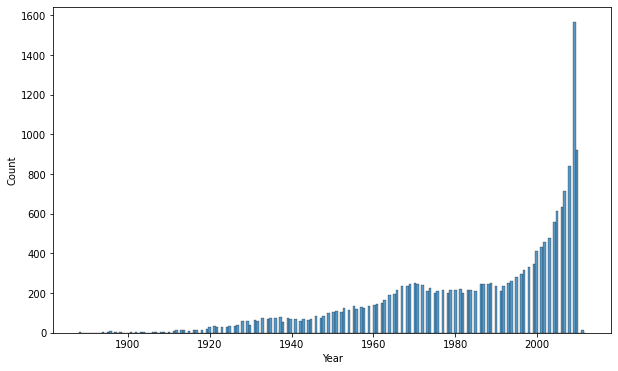

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data = data_movies,x='Year',bins = 200)
plt.show()

Dapat dilihat pada gambar di atas bahwa mulai tahun 1990 sampai 2000an terjadi peningkatan pada grafik yang artinya pada tahun tersebut banyak film yang rilis

In [22]:
data_movies.head()

,Movie_ID,Name,Year,Director
0,1,La Antena,2007.0,Esteban Sapir
1,2,Elementary Particles,2006.0,Oskar Roehler
2,3,It's Winter,2006.0,Rafi Pitts
3,4,Kirikou and the Wild Beasts,2005.0,"Michel Ocelot, Bénédicte Galup"
4,5,Padre Nuestro,2007.0,Christopher Zalla


Menggabungkan data_ratings dan data_movie

In [23]:
df = data_ratings.merge(data_movies,how='inner',on='Movie_ID')

In [24]:
df.head()

,Movie_ID,Rating,User_ID,Name,Year,Director
0,1066,3.0,41579158,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden
1,1066,2.0,85981819,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden
2,1066,2.0,4208563,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden
3,1066,3.0,9820140,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden
4,1066,4.0,68654088,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden


In [25]:
movie_ratings = df.groupby('Name')['Rating'].count().reset_index().rename(columns={'Rating':'Total_rating'})

In [26]:
movie_ratings

,Name,Total_rating
0,A Way of Life,27
1,Carmen,18
2,Close-Up,2760
3,Confidentially Yours,1985
4,Dodes'ka-den,802
5,General Della Rovere,326
6,Get Carter,1210
7,Hobson's Choice,676
8,In the City of Sylvia,1116
9,Innocence Unprotected,172


Kemudian disini saya melakukan visualisasi data 10 besar film yang sudah dirilis menggunakan barplot. Visualisasi data ini mengambil data pengguna yang memberikan penilaian pada suatu film.

<function matplotlib.pyplot.plot>

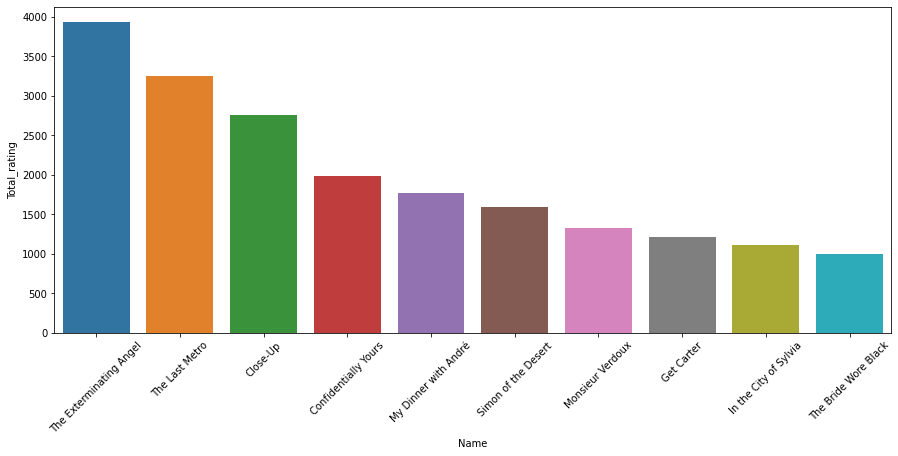

In [27]:
ratings_visual = movie_ratings.sort_values(by ='Total_rating',ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x='Name',y='Total_rating',data=ratings_visual.iloc[:10,:])
plt.xticks(rotation=45)
plt.plot

Selanjutnya juga pada kolom director dilakukan visualisasi data untuk melihat 10 director terpopuler

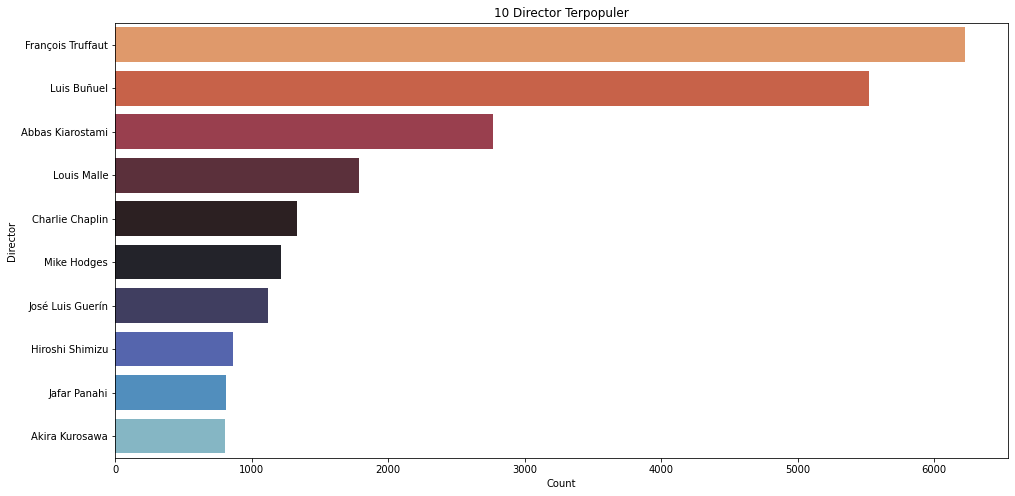

In [28]:
directors = df.Director.value_counts().reset_index()
directors.columns = ['Director','count']

plt.figure(figsize = (16,8))
plt.title("10 Director Terpopuler")
sns.barplot(x = 'count', y = 'Director', data = directors.head(10), palette='icefire_r');
plt.ylabel('Director')
plt.xlabel('Count')
plt.show()

#**Data Preparation**
Dalam data preparation ini saya menggunakan beberapa teknik untuk memeriksa ketiga data yang saya gunakan. Data yang dimaksud yaitu pada data_movie, data_ratings, dan df (gabungan kedua data)

Teknik pertama yaitu mengecek data null karena jika ada data yang kosong atau nol akan membuat prediksi menjadi kurang akurat 

In [29]:
data_ratings.isnull().sum()

Movie_ID     0
Rating      64
User_ID      0
dtype: int64

Output diatas menunjukkan pada kolom Rating mengandung null maka kita hapus menggunakan dataframe.dropna()

In [30]:
data_ratings = data_ratings.dropna()

In [31]:
data_ratings

,Movie_ID,Rating,User_ID
0,1066,3.0,41579158
1,1066,2.0,85981819
2,1066,2.0,4208563
3,1066,3.0,9820140
4,1066,4.0,68654088
...,...,...,...
24995,1100,4.0,99915454
24996,1100,5.0,61633416
24997,1100,4.0,2705538
24998,1100,5.0,46430223


In [32]:
data_movies.isnull().sum()

Movie_ID    0
Name        0
Year        0
Director    0
dtype: int64

Kemudian pada data_movie tidak mengandung null maka tidak dilakukan dropna

In [33]:
data_movies

,Movie_ID,Name,Year,Director
0,1,La Antena,2007.0,Esteban Sapir
1,2,Elementary Particles,2006.0,Oskar Roehler
2,3,It's Winter,2006.0,Rafi Pitts
3,4,Kirikou and the Wild Beasts,2005.0,"Michel Ocelot, Bénédicte Galup"
4,5,Padre Nuestro,2007.0,Christopher Zalla
...,...,...,...,...
19995,33919,"China, the Empire of Art?",2010.0,"Emma Tassy, Sheng Zhimin"
19996,33920,A Man's Story,2010.0,Varon Bonicos
19997,33921,In My Mother's Arms,2011.0,"Mohamed Al-Daradji, Atia Al-Daradji"
19998,33922,We Were Communists,2010.0,Maher Abi Samra


In [34]:
df.isnull().sum()

Movie_ID     0
Rating      64
User_ID      0
Name         0
Year         0
Director     0
dtype: int64

In [35]:
df = df.dropna()

In [36]:
df

,Movie_ID,Rating,User_ID,Name,Year,Director
0,1066,3.0,41579158,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden
1,1066,2.0,85981819,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden
2,1066,2.0,4208563,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden
3,1066,3.0,9820140,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden
4,1066,4.0,68654088,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden
...,...,...,...,...,...,...
24995,1100,4.0,99915454,The Trial,1962.0,Orson Welles
24996,1100,5.0,61633416,The Trial,1962.0,Orson Welles
24997,1100,4.0,2705538,The Trial,1962.0,Orson Welles
24998,1100,5.0,46430223,The Trial,1962.0,Orson Welles


Selanjutnya yaitu Encoding Data

Encoding pada User_ID

In [37]:
# Mengubah User_ID menjadi list tanpa nilai yang sama
userid_list = df['User_ID'].unique().tolist()
print('list User_ID: ', userid_list)
print('Jumlah list User_ID: ', len(userid_list))
# Melakukan encoding User_ID
userid_encoded = {x: i for i, x in enumerate(userid_list)}
print('encoded User_ID : ', userid_encoded)
print('Jumlah encoded User_ID: ', len(userid_encoded))
# Melakukan proses encoding angka ke ke User_ID
encoded_to_user = {i: x for i, x in enumerate(userid_list)}
print('encoded angka ke User_ID: ', encoded_to_user)
print('Jumlah encoded angka ke User_ID: ', len(encoded_to_user))

list User_ID:  [41579158, 85981819, 4208563, 9820140, 68654088, 97262846, 52128819, 57756708, 58420503, 78114925, 84114365, 15492642, 29755671, 8516503, 9315002, 93302487, 18845680, 80455170, 88637641, 65861201, 9873777, 43826147, 2591449, 95094020, 86451071, 39115684, 62878266, 50723136, 26396241, 17555031, 75121198, 77160746, 30391946, 4824346, 84430430, 71982300, 37479126, 17798785, 81146960, 44050797, 56747794, 9871496, 12971768, 65200528, 76331946, 39823163, 75763793, 30621034, 83373278, 69110238, 92197254, 16192326, 96910625, 29298131, 64235925, 9698269, 10036141, 39482472, 32172230, 39803646, 10386642, 35045915, 12295046, 14527840, 88289058, 48907656, 29588707, 77588452, 73705284, 48568220, 64405760, 55358262, 31334978, 73635062, 90756463, 23938069, 26925479, 82943667, 90249294, 58149469, 71227296, 53064715, 42746062, 93408567, 93170830, 77511947, 47069009, 37626660, 26377286, 3634142, 16599960, 60102687, 60375385, 80678542, 73887357, 9136729, 55025277, 28613820, 70060851, 71857

Encoding data pada Movie_ID

In [38]:
# Mengubah Movie_ID menjadi list tanpa nilai yang sama
movieid_list = df['Movie_ID'].unique().tolist()
# Proses encoding Movie_ID
movieid_encoded = {x: i for i, x in enumerate(movieid_list)}
# Proses encoding angka ke Movie_ID
encoded_to_movie = {i: x for i, x in enumerate(movieid_list)}
# Memetakkan User_ID ke dataframe User
df['User'] = df['User_ID'].map(userid_encoded)
# Memetakkan Movie_ID ke dataframe Movie
df['Movie'] = df['Movie_ID'].map(movieid_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [39]:
df

,Movie_ID,Rating,User_ID,Name,Year,Director,User,Movie
0,1066,3.0,41579158,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden,0,0
1,1066,2.0,85981819,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden,1,0
2,1066,2.0,4208563,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden,2,0
3,1066,3.0,9820140,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden,3,0
4,1066,4.0,68654088,Pavee Lackeen: The Traveller Girl,2005.0,Perry Ogden,4,0
...,...,...,...,...,...,...,...,...
24995,1100,4.0,99915454,The Trial,1962.0,Orson Welles,13563,31
24996,1100,5.0,61633416,The Trial,1962.0,Orson Welles,7087,31
24997,1100,4.0,2705538,The Trial,1962.0,Orson Welles,13564,31
24998,1100,5.0,46430223,The Trial,1962.0,Orson Welles,6189,31


In [40]:
num_users = len(userid_encoded)
print(num_users)
# Mengecek jumlah user/pengguna
 
num_movie = len(encoded_to_movie)
print(num_movie)
# Mengecek jumlah film
 
# Mengubah Rating menjadi tipe data float
df['Rating'] = df['Rating'].values.astype(np.float32)

# Mengecek nilai minimum pada Rating
min_rating = min(df['Rating'])
# Mengecek nilai maksimum pada Rating
max_rating = max(df['Rating'])
 
print('Jumlah pengguna: {}, Jumlah film: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

13566
32
Jumlah pengguna: 13566, Jumlah film: 32, Min Rating: 1.0, Max Rating: 5.0


In [41]:
df = df.sample(frac=1, random_state=42)
df

,Movie_ID,Rating,User_ID,Name,Year,Director,User,Movie
970,1073,4.0,91496070,Innocence Unprotected,1968.0,Dušan Makavejev,913,7
9275,1083,4.0,56910884,Dodes'ka-den,1970.0,Akira Kurosawa,888,14
22108,1097,3.0,56452459,Confidentially Yours,1983.0,François Truffaut,5282,28
19366,1094,5.0,86237665,Monsieur Verdoux,1947.0,Charlie Chaplin,1064,25
4335,1076,5.0,3195597,The Exterminating Angel,1962.0,Luis Buñuel,4058,8
...,...,...,...,...,...,...,...,...
21634,1096,3.0,76619141,The Bride Wore Black,1968.0,François Truffaut,745,27
5403,1077,5.0,25522758,Simon of the Desert,1965.0,Luis Buñuel,4749,9
870,1073,4.0,94719356,Innocence Unprotected,1968.0,Dušan Makavejev,828,7
15828,1092,4.0,64954739,Close-Up,1990.0,Abbas Kiarostami,5580,23


Membagi data menjadi data train dan validasi. Dimana persentasenya yaitu 80% data train dan 20% data validasi

In [42]:
x = df[['User', 'Movie']].values
y = df['Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[ 913    7]
 [ 888   14]
 [5282   28]
 ...
 [ 828    7]
 [5580   23]
 [ 874   29]] [0.75 0.75 0.5  ... 0.75 0.75 0.75]


#**Modeling**
Import library

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import  EarlyStopping

Untuk modeling menggunakan metode deep learning untuk sistem rekomendasi berbasis collaborative filtering dimana model ini akan menghasilkan rekomendasi untuk satu pengguna sesuai dengan penilaian sebelumnya

In [44]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.movie_embedding = layers.Embedding(
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) 
    user_bias = self.user_bias(inputs[:, 0]) 
    movie_vector = self.movie_embedding(inputs[:, 1]) 
    movie_bias = self.movie_bias(inputs[:, 1]) 
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) 

Melatih model

In [45]:
model = RecommenderNet(num_users, num_movie, 50) 
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.0, nesterov = False),
    metrics=[[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()]]
)
callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=7,
    verbose=0, 
    restore_best_weights=True,
)

In [46]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/50
1247/1247 [==============================] - 9s 7ms/step - loss: 0.6581 - mean_absolute_error: 0.2723 - root_mean_squared_error: 0.3172 - val_loss: 0.6318 - val_mean_absolute_error: 0.2527 - val_root_mean_squared_error: 0.2944
Epoch 2/50
1247/1247 [==============================] - 8s 6ms/step - loss: 0.5981 - mean_absolute_error: 0.2298 - root_mean_squared_error: 0.2678 - val_loss: 0.6036 - val_mean_absolute_error: 0.2306 - val_root_mean_squared_error: 0.2710
Epoch 3/50
1247/1247 [==============================] - 8s 6ms/step - loss: 0.5719 - mean_absolute_error: 0.2060 - root_mean_squared_error: 0.2448 - val_loss: 0.5888 - val_mean_absolute_error: 0.2172 - val_root_mean_squared_error: 0.2582
Epoch 4/50
1247/1247 [==============================] - 8s 6ms/step - loss: 0.5599 - mean_absolute_error: 0.1949 - root_mean_squared_error: 0.2340 - val_loss: 0.5802 - val_mean_absolute_error: 0.2092 - val_root_mean_squared_error: 0.2507
Epoch 5/50
1247/1247 [==========================

In [47]:
movie_df = data_movies

userId = df.User_ID.sample(1).iloc[0]
movie_visited_by_user = df[df.User_ID == userId]
 
movie_not_visited = movie_df[~movie_df['Movie_ID'].isin(movie_visited_by_user.Movie_ID.values)]['Movie_ID'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movieid_encoded.keys()))
)

 
movie_not_visited = [[movieid_encoded.get(x)] for x in movie_not_visited]
user_encoder = userid_encoded.get(userId)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

Menampilkan rekomendasi film

In [48]:
rating_model = model.predict(user_movie_array).flatten()
 
top_ratings = rating_model.argsort()[-10:][::-1]
recommended_movie_ids = [
    encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings
]
 
print('ID pengguna: {}'.format(userId))
print('===' * 9)
print('Film dengan rating tinggi dari pengguna')
print('----' * 8)
 
top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    .Movie_ID.values
)
 
movie_df_rows = movie_df[movie_df['Movie_ID'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.Name)
 
print('----' * 8)
print('Rekomendasi 10 film')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['Movie_ID'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.Name)

ID pengguna: 59683323
Film dengan rating tinggi dari pengguna
--------------------------------
The Exterminating Angel
In the City of Sylvia
Mr. Thank You
Young Aphrodites
Get Carter
--------------------------------
Rekomendasi 10 film
--------------------------------
Hobson's Choice
The Circle
Dodes'ka-den
The Last Metro
General Della Rovere
Japanese Girls at the Harbor
Ornamental Hairpin
My Dinner with André
Monsieur Verdoux
Confidentially Yours


#**Evaluation**

Menampilkan visualisasi dari metriks MAE dan RMSE

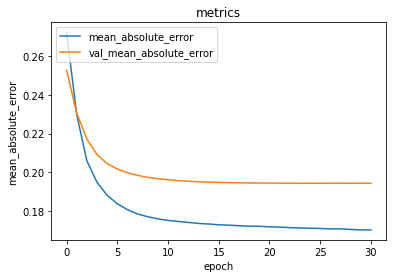

In [49]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('metrics')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['mean_absolute_error', 'val_mean_absolute_error'], loc='upper left')
plt.show()

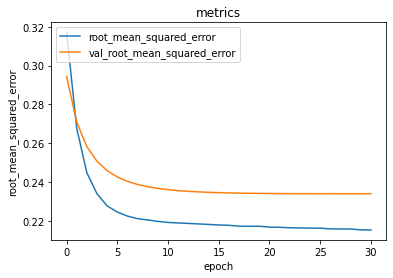

In [50]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['root_mean_squared_error', 'val_root_mean_squared_error'], loc='upper left')
plt.show()